In [ ]:
!pip install kaggle

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Importing the Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting the dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data   face-mask-dataset.zip  kaggle.json  sample_data
drive  images_test.jpg	      pro_pic.jpg


importing the dependencies

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_3147.jpg', 'with_mask_1983.jpg', 'with_mask_2761.jpg', 'with_mask_1286.jpg', 'with_mask_349.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_2516.jpg', 'without_mask_2375.jpg', 'without_mask_715.jpg', 'without_mask_575.jpg', 'without_mask_2717.jpg']


In [ ]:
#Counting number of files present
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))


Number of with mask images: 3725
Number of without mask images: 3828


Creating for the two class of images

With mask --> 1
Without mask --> 0

In [ ]:
with_mask_labels=[1]*3725

without_mask_labels=[0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
#combining labels
labels= with_mask_labels + without_mask_labels
print(len(labels))

7553


Checking Images

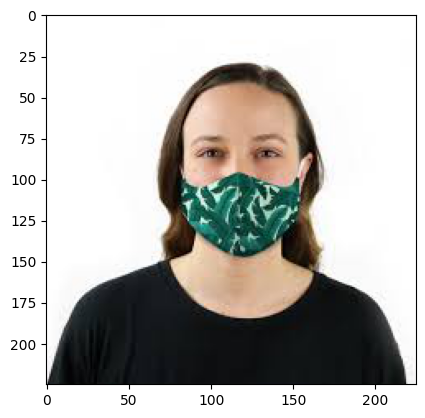

In [ ]:
#displaying with mask images
img=mpimg.imread('/content/data/with_mask/with_mask_2560.jpg')
implot=plt.imshow(img)
plt.show()

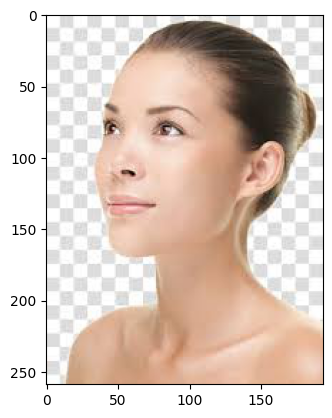

In [ ]:
#displaying without mask images
img=mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
implot=plt.imshow(img)
plt.show()

**Image Processing**



```
1. Resize images
2. Convert the images to numpy arrays for NN



In [ ]:
# convert images to numpy arrays

with_mask_path='/content/data/with_mask/'
data=[]

for img_file in with_mask_files:
  image= Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


# convert images to numpy arrays

without_mask_path='/content/data/without_mask/'
# data=[]

for img_file in without_mask_files:
  image= Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)




/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# type(data)
print(len(data))

7553


In [ ]:
data[0]

array([[[129, 130, 134],
        [129, 130, 134],
        [129, 130, 134],
        ...,
        [129, 130, 134],
        [129, 130, 134],
        [129, 130, 134]],

       [[129, 130, 134],
        [129, 130, 134],
        [129, 130, 134],
        ...,
        [129, 130, 134],
        [129, 130, 134],
        [129, 130, 134]],

       [[129, 130, 134],
        [129, 130, 134],
        [129, 130, 134],
        ...,
        [129, 130, 134],
        [129, 130, 134],
        [129, 130, 134]],

       ...,

       [[129, 130, 134],
        [129, 130, 134],
        [129, 130, 134],
        ...,
        [129, 130, 134],
        [129, 130, 134],
        [129, 130, 134]],

       [[129, 130, 134],
        [129, 130, 134],
        [129, 130, 134],
        ...,
        [129, 130, 134],
        [129, 130, 134],
        [129, 130, 134]],

       [[129, 130, 134],
        [129, 130, 134],
        [129, 130, 134],
        ...,
        [129, 130, 134],
        [129, 130, 134],
        [129, 130, 134]]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
# type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Splitting the Dataset for **Training**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[235, 197, 220],
        [233, 195, 218],
        [243, 205, 228],
        ...,
        [238, 194, 219],
        [238, 194, 219],
        [238, 194, 219]],

       [[238, 200, 223],
        [232, 194, 217],
        [236, 198, 221],
        ...,
        [237, 193, 218],
        [237, 193, 218],
        [237, 193, 218]],

       [[233, 195, 218],
        [234, 196, 219],
        [236, 198, 221],
        ...,
        [235, 191, 216],
        [236, 192, 217],
        [236, 192, 217]],

       ...,

       [[175, 138, 127],
        [181, 142, 132],
        [178, 138, 129],
        ...,
        [144,  95,  93],
        [128,  78,  77],
        [174, 124, 124]],

       [[153, 114, 110],
        [159, 117, 115],
        [158, 114, 112],
        ...,
        [183, 136, 130],
        [168, 120, 115],
        [221, 174, 168]],

       [[188, 150, 150],
        [184, 143, 144],
        [140,  96,  98],
        ...,
        [200, 158, 150],
        [170, 124, 116],
        [224, 179, 170]]

In [ ]:
X_train_scaled[0]

array([[[0.92156863, 0.77254902, 0.8627451 ],
        [0.91372549, 0.76470588, 0.85490196],
        [0.95294118, 0.80392157, 0.89411765],
        ...,
        [0.93333333, 0.76078431, 0.85882353],
        [0.93333333, 0.76078431, 0.85882353],
        [0.93333333, 0.76078431, 0.85882353]],

       [[0.93333333, 0.78431373, 0.8745098 ],
        [0.90980392, 0.76078431, 0.85098039],
        [0.9254902 , 0.77647059, 0.86666667],
        ...,
        [0.92941176, 0.75686275, 0.85490196],
        [0.92941176, 0.75686275, 0.85490196],
        [0.92941176, 0.75686275, 0.85490196]],

       [[0.91372549, 0.76470588, 0.85490196],
        [0.91764706, 0.76862745, 0.85882353],
        [0.9254902 , 0.77647059, 0.86666667],
        ...,
        [0.92156863, 0.74901961, 0.84705882],
        [0.9254902 , 0.75294118, 0.85098039],
        [0.9254902 , 0.75294118, 0.85098039]],

       ...,

       [[0.68627451, 0.54117647, 0.49803922],
        [0.70980392, 0.55686275, 0.51764706],
        [0.69803922, 0

**Building a Custom Convolutional Neural Networks (CNN)**


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental import preprocessing


In [ ]:
from keras.engine.input_layer import Input
num_of_classes=2

model=keras.Sequential([
    layers.InputLayer(input_shape=[128, 128, 3]),
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.1),
    # preprocessing.RandomFlip(mode='horizontal'),
    # preprocessing.RandomRotation(factor=0.1),

    # layers.BatchNormalization(renorm=True),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),

    # layers.BatchNormalization(renorm=True),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    # layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),


    layers.Dense(num_of_classes, activation='sigmoid'),

])

model.add(Input(shape=(128,128,3)))

#implenting augmentation layer


# model.add(keras.layers.experimental.image_preprocessing(RandomFlip(mode="horizontal_and_vertical")))
# model.add(keras.layers.experimental.preprocessing(RandomRotation(0.1)))


# #more layers
# model.add(keras.)
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


# model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(keras.layers.Flatten())

# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.5))

# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.5))

# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))


# model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [ ]:
# compile the neural network

# Optimizer = tf.keras.optimizers.Adam(epsilon=0.01)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=6)

Epoch 1/6
170/170 [==============================] - 169s 983ms/step - loss: 0.4819 - acc: 0.7795 - val_loss: 0.3145 - val_acc: 0.8777
Epoch 2/6
170/170 [==============================] - 162s 955ms/step - loss: 0.2996 - acc: 0.8816 - val_loss: 0.2224 - val_acc: 0.9074
Epoch 3/6
170/170 [==============================] - 162s 953ms/step - loss: 0.2375 - acc: 0.9066 - val_loss: 0.2510 - val_acc: 0.8992
Epoch 4/6
170/170 [==============================] - 159s 938ms/step - loss: 0.2015 - acc: 0.9202 - val_loss: 0.2328 - val_acc: 0.8992
Epoch 5/6
170/170 [==============================] - 160s 943ms/step - loss: 0.1703 - acc: 0.9314 - val_loss: 0.2252 - val_acc: 0.9074
Epoch 6/6
170/170 [==============================] - 165s 974ms/step - loss: 0.1566 - acc: 0.9367 - val_loss: 0.2254 - val_acc: 0.9190


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 12s 255ms/step - loss: 0.2040 - acc: 0.9272
Test Accuracy = 0.9272005558013916


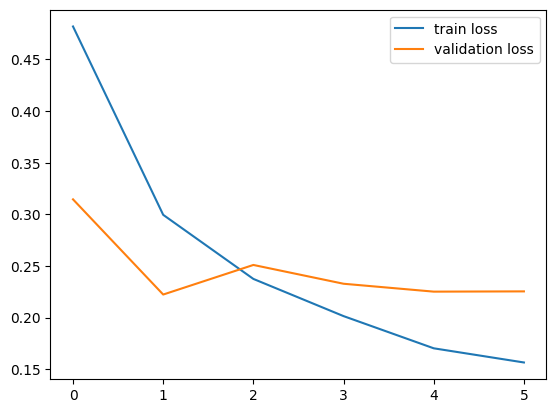

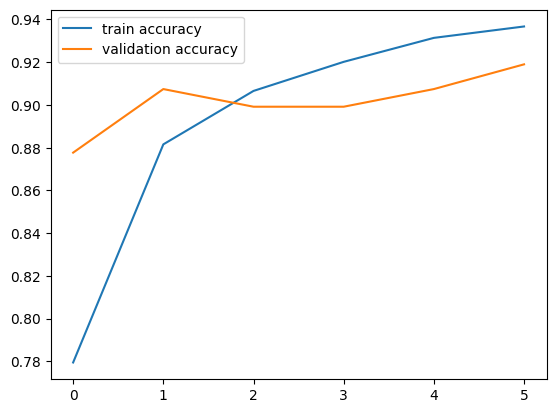

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Building Predictive System

Path of the image to be predicted: /content/images_test.jpg


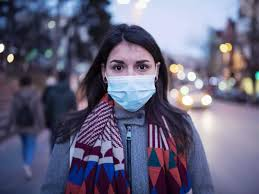

1/1 [==============================] - 0s 34ms/step
[[0.72933245 0.21549602]]
0
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Training on a Pre-Trained Model

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

In [ ]:
num_of_classes = 2

pretrained_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5")

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_9 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train,validation_split=0.1, epochs=5)


Epoch 1/5
170/170 [==============================] - 300s 1s/step - loss: 0.0750 - acc: 0.9768 - val_loss: 0.0257 - val_acc: 0.9917
Epoch 2/5
170/170 [==============================] - 217s 1s/step - loss: 0.0253 - acc: 0.9930 - val_loss: 0.0187 - val_acc: 0.9950
Epoch 3/5
170/170 [==============================] - 234s 1s/step - loss: 0.0168 - acc: 0.9958 - val_loss: 0.0191 - val_acc: 0.9934
Epoch 4/5
170/170 [==============================] - 246s 1s/step - loss: 0.0129 - acc: 0.9976 - val_loss: 0.0190 - val_acc: 0.9934
Epoch 5/5
170/170 [==============================] - 240s 1s/step - loss: 0.0100 - acc: 0.9976 - val_loss: 0.0225 - val_acc: 0.9917


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print(f'Test Loss ={score}')
print(f'Test Accuracy ={acc}')

48/48 [==============================] - 53s 1s/step - loss: 0.0271 - acc: 0.9894
Test Loss =0.02712603472173214
Test Accuracy =0.9894109964370728
